In [1]:
pip install -U spacy

Requirement already up-to-date: spacy in c:\users\91966\anaconda3\lib\site-packages (3.0.6)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied, skipping upgrade: thinc<8.1.0,>=8.0.3 in c:\users\91966\anaconda3\lib\site-packages (from spacy) (8.0.3)



In [2]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2021-05-28 15:25:10.389347: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-05-28 15:25:10.389389: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
import webbrowser
webbrowser.open('https://www.amazon.in/Samsung-Galaxy-10-1-Wi-Fi-Silver/dp/B07SSTH14H')
webbrowser

<module 'webbrowser' from 'C:\\Users\\91966\\anaconda3\\lib\\webbrowser.py'>

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [6]:
failed_page = []
cust_name = []
cust_rate = []
rev_date = []
rev_title = []
rev_text = []
for p in range(1,50):
  link = "https://www.amazon.in/Samsung-Galaxy-10-1-Wi-Fi-Silver/product-reviews/B07SSTH14H/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(p)
  page = requests.get(link)
  if(str(page) == "<Response [200]>"):
    soup = BeautifulSoup(page.content,'html.parser')
    names = soup.select('span.a-profile-name')[2:]
    stars = soup.select('span.a-icon-alt')[3:]
    dates = soup.select('span.review-date')[2:]
    titles = soup.select('a.review-title span')
    reviews = soup.select('span.review-text span')
    for i in range(10):
      cust_name.append(names[i].getText())
      cust_rate.append(stars[i].getText().rstrip(" out of 5 stars"))
      rev_date.append(dates[i].getText().lstrip("Reviewed in India on "))
      rev_title.append(titles[i].getText())
      rev_text.append(reviews[i].getText().strip("\n "))
  else:
    failed_page.append(p)

In [7]:
#MAKE A DATA FRAME
df = pd.DataFrame()   ## empty dataframe
df['Date'] = rev_date
df['Customer Name'] = cust_name
df['Ratings'] = cust_rate
df['Review Title'] = rev_title
df['Reviews'] = rev_text
df.index = df.index+1
df

,Date,Customer Name,Ratings,Review Title,Reviews
1,1 July 2019,Satyaki Dandi,4.0,A more than decent buy for the price,"Pros:1. The price. For this range,the other op..."
2,29 June 2019,Kapil Sharma,5.0,Cheap and best...love it,Mindblowing tablet this is the cheap and best....
3,1 July 2019,Harmeet,5.0,"Brilliant , value for money. Looks and works l...","Ok so, i am a basic user buying a tab for educ..."
4,12 July 2019,AdiB,5.0,Great value for money for simple jobs,At Rs15k price it serves my purpose of1. Brows...
5,10 July 2019,Vikramaditya Reddy,5.0,Best Tab of the year,I have unboxed this Samsung galaxy tab A 2019 ...
...,...,...,...,...,...
446,26 August 2020,anshul,5.0,Best tab,Best tab in ₹15000You can play games in it or ...
447,10 February 2020,Parikshit,5.0,Best tab,Beast of mid range tablets🔥🔥If your google pla...
448,23 October 2020,Pankaj Choudhary,5.0,Great product for students and family .,Only for entertainment purposesNot for gaming ...
449,30 January 2021,Anup Batham,5.0,"Dont go right or left, buy this",If you want to buy a tablet for studies then t...


###Preprocessing

In [8]:
# remove both the leading and the trailing characters
df = [Reviews.strip() for Reviews in df.Reviews]
# removes empty strings, because they are considered in Python as False
df= [Reviews for Reviews in df if Reviews] 
df[0:5]

["Pros:1. The price. For this range,the other options available are too old to soon become expensive photo albums,or not upto the mark.2. The screen,though not amoled,has a crisp feel about it. I think its IPS...nevertheless its more than enough for reading,watching videos and other regular stuff. Though not a top notch screen for first person shooter games, it works just fine for all your other stuff. I'm not a avid gamer,so it doesn't really matter to me.3. The dual speakers are pretty loud and has more than expected crispness to the audio. There is a con though with the speakers,that I'll talk about later.4. Near stock android , and not overloaded with changes. So, it has a nice , easy to use , feel to it.5. The metal back and the compact size:screen ratio, makes it look and feel pretty premium .6. It has a nice big battery. Lasts me through the entire day, with casual use, with some to spare.7. 3.5mm Jack. 'Nuff said.8. No physical buttons. Really makes the tab , look and feel that

In [9]:
# Now we check sentiment score for sentences(reviews)
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(df))
sentences[5:15]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91966\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['Though not a top notch screen for first person shooter games, it works just fine for all your other stuff.',
 "I'm not a avid gamer,so it doesn't really matter to me.3.",
 'The dual speakers are pretty loud and has more than expected crispness to the audio.',
 "There is a con though with the speakers,that I'll talk about later.4.",
 'Near stock android , and not overloaded with changes.',
 'So, it has a nice , easy to use , feel to it.5.',
 'The metal back and the compact size:screen ratio, makes it look and feel pretty premium .6.',
 'It has a nice big battery.',
 'Lasts me through the entire day, with casual use, with some to spare.7.',
 '3.5mm Jack.']

In [10]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Pros:1.
1,The price.
2,"For this range,the other options available are..."
3,"The screen,though not amoled,has a crisp feel ..."
4,I think its IPS...nevertheless its more than e...
...,...
1181,It came with Android 10.
1182,Performance is great.
1183,Screen quality is really good.
1184,Weight is on higher side.


In [11]:
import spacy
nlp = spacy.load('en_core_web_md')



In [14]:
#Affin laxicon
afinn = pd.read_csv("Afinn.csv", sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [15]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [16]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20, affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [17]:
sentiment_laxicon = affinity_scores

In [18]:
sentiment_laxicon

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [19]:
def calculate_sentiment (text: str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score += sentiment_laxicon.get(word.lemma_, 0)
    return sent_score

In [20]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

,sentence,sentiment_value
0,Pros:1.,0
1,The price.,0
2,"For this range,the other options available are...",0
3,"The screen,though not amoled,has a crisp feel ...",0
4,I think its IPS...nevertheless its more than e...,0
...,...,...
1181,It came with Android 10.,0
1182,Performance is great.,3
1183,Screen quality is really good.,3
1184,Weight is on higher side.,0


In [21]:
# how many words are in the sentence
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0        1
1        2
2       19
3        9
4       15
        ..
1181     5
1182     3
1183     5
1184     5
1185    13
Name: word_count, Length: 1186, dtype: int64

In [22]:
sent_df

,sentence,sentiment_value,word_count
0,Pros:1.,0,1
1,The price.,0,2
2,"For this range,the other options available are...",0,19
3,"The screen,though not amoled,has a crisp feel ...",0,9
4,I think its IPS...nevertheless its more than e...,0,15
...,...,...,...
1181,It came with Android 10.,0,5
1182,Performance is great.,3,3
1183,Screen quality is really good.,3,5
1184,Weight is on higher side.,0,5


In [23]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
328,the overall rating for this tablet is 4 bcoz i...,19,248
281,"Battery backup is amazing, sound quality is su...",19,25
346,"Box content- Tablet,Charger adaptor,type c cab...",21,178
143,I was using this for media consumption.Lets go...,23,91
329,"This is best tablet with great price , screen ...",24,124
1038,The screen has a slight yellowish tint which i...,25,93
980,"Camera could hv been bit more better, over all...",25,54
1072,Its not supposed for freefire ultra graphics b...,25,66
974,The build quality is amazing I really loved it...,27,47
850,good experience but no sim supported I use thi...,37,72


In [24]:
sent_df['sentiment_value'].describe()

count    1186.000000
mean        2.153457
std         3.929126
min       -11.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        37.000000
Name: sentiment_value, dtype: float64

In [25]:
# Sentiment score of the whole review <0
sent_df[sent_df['sentiment_value']<0]

,sentence,sentiment_value,word_count
9,"Near stock android , and not overloaded with c...",-1,9
16,No physical buttons.,-1,3
20,Can't overload the phone.,-1,4
24,No stereo separation at all.,-1,5
25,Can be really annoying at times.3.,-2,6
...,...,...,...
1115,Till now I have no problem.,-3,6
1145,Otherwise it's performance is as expected only...,-1,13
1156,Galaxy Tab has developed a battery problem.,-2,7
1159,You can go for it without any doubt .,-1,9


In [26]:
# Sentiment score of the whole review >=0
sent_df[sent_df['sentiment_value']>=10]

,sentence,sentiment_value,word_count
59,We expect transparency from Amazon..... Best A...,13,27
143,I was using this for media consumption.Lets go...,23,91
274,I was bit skeptical to buy this TAB but after ...,19,225
281,"Battery backup is amazing, sound quality is su...",19,25
284,"Features I like the most..- Slim tablet, easy ...",12,97
321,We have waited for this tab almost a month as ...,14,102
328,the overall rating for this tablet is 4 bcoz i...,19,248
329,"This is best tablet with great price , screen ...",24,124
333,"#For pdf study , online classes, notes...etc#M...",16,61
346,"Box content- Tablet,Charger adaptor,type c cab...",21,178


In [27]:
sent_df['index']=range(0,len(sent_df))

In [28]:
sent_df=sent_df[['index']+['sentence']+['word_count']+['sentiment_value']]
sent_df.reset_index(drop=True)
sent_df

,index,sentence,word_count,sentiment_value
0,0,Pros:1.,1,0
1,1,The price.,2,0
2,2,"For this range,the other options available are...",19,0
3,3,"The screen,though not amoled,has a crisp feel ...",9,0
4,4,I think its IPS...nevertheless its more than e...,15,0
...,...,...,...,...
1181,1181,It came with Android 10.,5,0
1182,1182,Performance is great.,3,3
1183,1183,Screen quality is really good.,5,3
1184,1184,Weight is on higher side.,5,0


#Assign labels

In [29]:
sentiment = []
for i in range(len(sent_df)):
  c = sent_df.loc[i]['sentiment_value']
  if c>0:
    sentiment.append("positive")
  elif c<0:
    sentiment.append("Negative")
  else:
    sentiment.append("Neutral")
sent_df['Sentiment']=sentiment
sent_df

<ipython-input-29-1de013f99034>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Sentiment']=sentiment


,index,sentence,word_count,sentiment_value,Sentiment
0,0,Pros:1.,1,0,Neutral
1,1,The price.,2,0,Neutral
2,2,"For this range,the other options available are...",19,0,Neutral
3,3,"The screen,though not amoled,has a crisp feel ...",9,0,Neutral
4,4,I think its IPS...nevertheless its more than e...,15,0,Neutral
...,...,...,...,...,...
1181,1181,It came with Android 10.,5,0,Neutral
1182,1182,Performance is great.,3,3,positive
1183,1183,Screen quality is really good.,5,3,positive
1184,1184,Weight is on higher side.,5,0,Neutral


#Visualization

<AxesSubplot:>

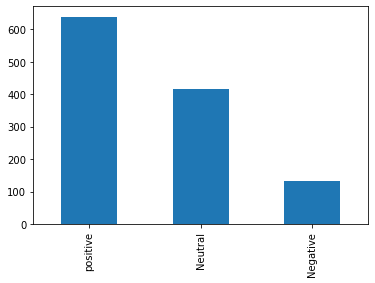

In [30]:
sent_df['Sentiment'].value_counts().plot(kind='bar')

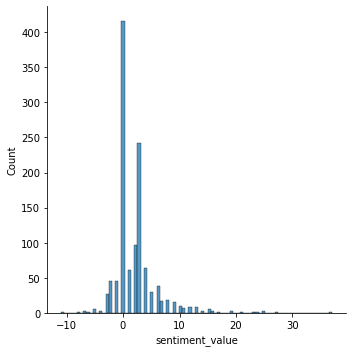

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

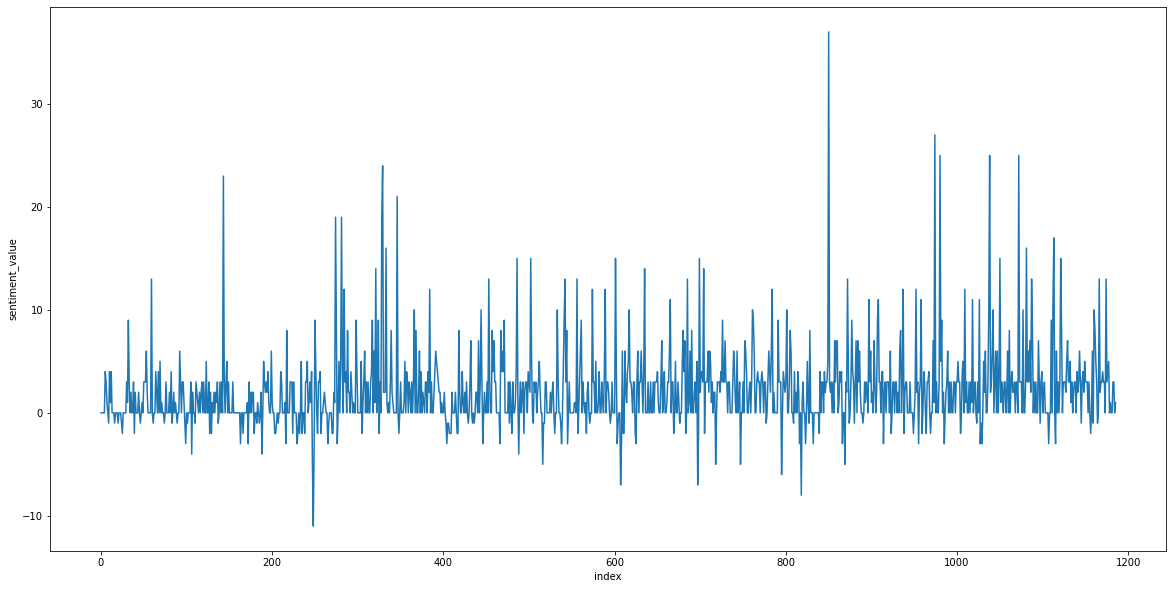

In [32]:
plt.figure(figsize=(20,10))
sns.lineplot(x='index', y='sentiment_value', data=sent_df)

<AxesSubplot:title={'center':'SENTENCE SENTIMENT VALUE TO SENTENCE WORD COUNT'}, xlabel='word_count', ylabel='sentiment_value'>

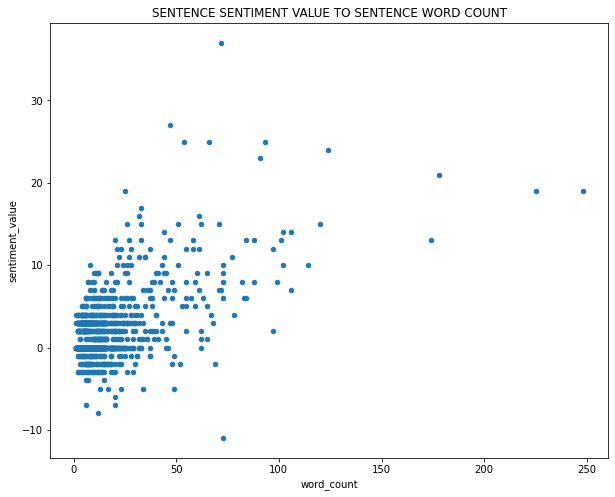

In [33]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(10,8), title='SENTENCE SENTIMENT VALUE TO SENTENCE WORD COUNT')